In [2]:
import sage_data_client
import matplotlib.pyplot as plt
import pandas as pd
from metpy.calc import dewpoint_from_relative_humidity, wet_bulb_temperature
from metpy.units import units
from PIL import Image

from matplotlib.dates import DateFormatter

In [73]:
# Query the SAGE data client to access the data; use 'name' filter
#this takes a LONG time when doing more than a day

df_temp = sage_data_client.query(start="2023-04-10T14:00:00Z",
                                 end="2023-04-13T23:00:00Z", 
                                    filter={
                                        "name" : 'wxt.env.temp|wxt.env.humidity|wxt.env.pressure',
                                        "plugin" : "10.31.81.1:5000/local/waggle-wxt536",
                                        "vsn" : "W057",
                                        "sensor" : "vaisala-wxt536"
                                    }
)

In [74]:
hums = df_temp[df_temp['name']=='wxt.env.humidity']
temps = df_temp[df_temp['name']=='wxt.env.temp']
pres = df_temp[df_temp['name']=='wxt.env.pressure']

In [75]:
npres = len(pres)
nhum = len(hums)
ntemps = len(temps)
print(npres, nhum, ntemps)
minsamps = min([nhum, ntemps, npres])


3681421 3681421 3681421


In [76]:
vals = temps.set_index('timestamp')[0:minsamps]
vals['temperatures'] = vals.value.to_numpy()[0:minsamps]
vals['humidity'] = hums.value.to_numpy()[0:minsamps]
vals['pressure'] = pres.value.to_numpy()[0:minsamps]

In [77]:
dp = dewpoint_from_relative_humidity( vals.temperatures.to_numpy() * units.degC, 
                                     vals.humidity.to_numpy() * units.percent)

vals['dewpoint'] = dp

In [78]:
im = Image.open('Argonnelablogo.PNG')


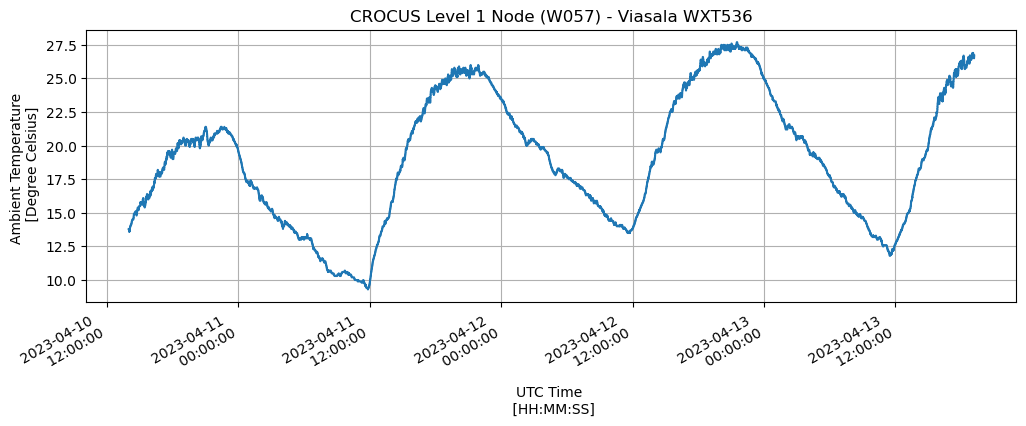

In [79]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
vals.temperatures.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Viasala WXT536',
                                          ax=axs
                                          )

axs.xaxis.set_major_formatter(date_form)
axs.grid(True)

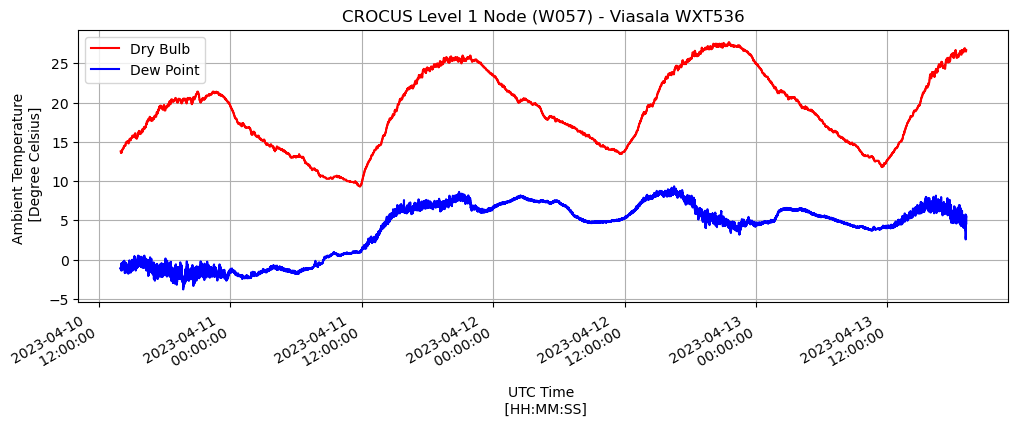

In [80]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
vals.temperatures.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Viasala WXT536',
                                          ax=axs, color='r', label='Dry Bulb'
                                          )


# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
vals.dewpoint.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Viasala WXT536',
                                          ax=axs, color='b', label='Dew Point'
                                          )




axs.xaxis.set_major_formatter(date_form)
axs.grid(True)
plt.legend()

In [81]:
vals10 = vals.resample('10S').mean()

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_68198/3583770663.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vals10 = vals.resample('10S').mean()


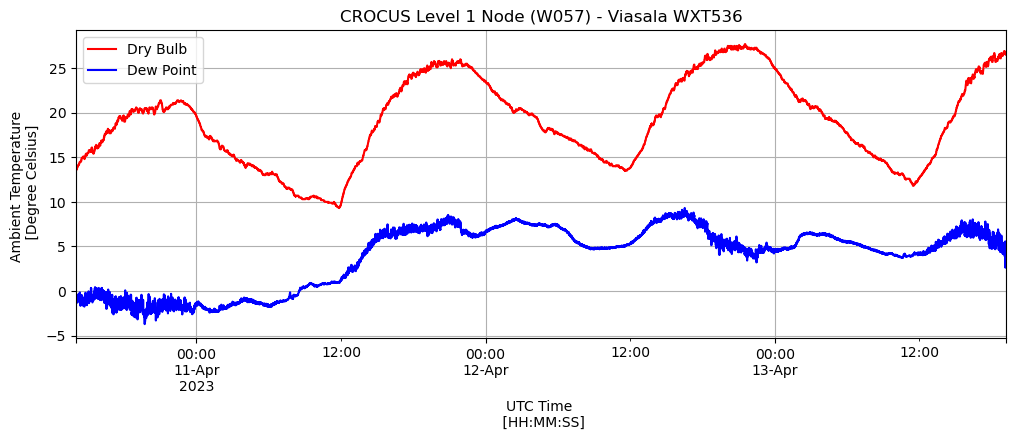

In [82]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
vals10.temperatures.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Viasala WXT536',
                                          ax=axs, color='r', label='Dry Bulb'
                                          )


# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
vals10.dewpoint.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Viasala WXT536',
                                          ax=axs, color='b', label='Dew Point'
                                          )




#axs.xaxis.set_major_formatter(date_form)
axs.grid(True)
plt.legend()

In [83]:
wb = wet_bulb_temperature(vals10.pressure.to_numpy() * units.hPa,
                          vals10.temperatures.to_numpy() * units.degC,
                          vals10.dewpoint.to_numpy() * units.degC)

#this takes some time

In [84]:
vals10['wetbulb'] = wb

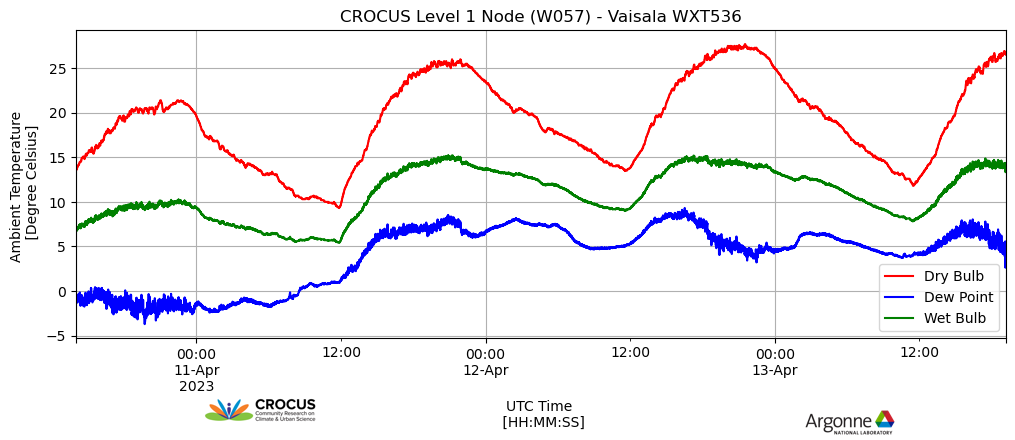

In [87]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
vals10.temperatures.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Vaisala WXT536',
                                          ax=axs, color='r', label='Dry Bulb'
                                          )


# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
vals10.dewpoint.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Vaisala WXT536',
                                          ax=axs, color='b', label='Dew Point'
                                          )


vals10.wetbulb.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Vaisala WXT536',
                                          ax=axs, color='g', label='Wet Bulb'
                                          )


#axs.xaxis.set_major_formatter(date_form)
axs.grid(True)
im = Image.open('Argonnelablogo.PNG')

im.thumbnail([im.size[0]/12, im.size[1]/12])
height = im.size[1]
width = im.size[0]
fig.figimage(im, 800  , 0)

im2 = Image.open('cr.png')

im2.thumbnail([im2.size[0]/4, im2.size[1]/4])
height = im2.size[1]
width = im2.size[0]
fig.figimage(im2, 200  , -10, zorder=-1)

plt.legend()